<a href="https://colab.research.google.com/github/suresh-padhiari/Intro-to-AI---Public/blob/main/Suresh_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gdrive


In [3]:
!pip uninstall pyarrow -y

Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Successfully uninstalled pyarrow-17.0.0


In [4]:
!pip install pyarrow==14.0.1

  Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (38.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.0.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.1 which is incompatible.


In [1]:
import pyarrow as pa
print(pa.__version__)

14.0.1


In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


AttributeError: module 'pyarrow.lib' has no attribute 'ListViewType'

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Key: c1e1220225a444809942b4b6d177acf4

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'c1e1220225a444809942b4b6d177acf4')

In [28]:
search_images_bing
results = search_images_bing(key, 'dog')
ims = results.attrgot('contentUrl')
len(ims)

150

In [29]:
# prompt: display data stored in ims

ims[1]


'https://i1.wp.com/www.smartdogguide.com/wp-content/uploads/2020/08/carolinadogp3094.jpg?resize=2048%2C1638&ssl=1'

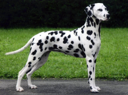

In [13]:
dest = 'images/dalmation1.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [30]:
dog_types = 'dog','notdog'
path = Path('dog')

In [31]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dog')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [32]:
fns = get_image_files(path)
fns

(#267) [Path('dog/dog/04d37027-b8b9-42b2-b27b-8d1578a4aed2.jpg'),Path('dog/dog/09d2834e-fd7e-4d14-b6d1-adb934138e1f.jpg'),Path('dog/dog/0f299e6d-5414-4703-9f92-16772ff863eb.jpg'),Path('dog/dog/c5ec1cb4-ab5b-4fd9-aed2-a0eca01e8a86.jpg'),Path('dog/dog/50a2a631-299c-423b-81a0-905cc7659ee1.jpg'),Path('dog/dog/273454a3-da6e-40d1-922c-5bfd24547ed0.jpg'),Path('dog/dog/d880aa03-508d-416d-8643-23111e91a9ff.jpg'),Path('dog/dog/dccbd863-b814-437a-a387-8b127e2254a7.jpg'),Path('dog/dog/d743ded8-fe5f-4fd5-9346-64fb4a40c69b.jpg'),Path('dog/dog/05c14ff8-bf68-4b82-83b0-5d37466b897a.jpg')...]

In [33]:
failed = verify_images(fns)
failed

(#2) [Path('dog/dog/05c14ff8-bf68-4b82-83b0-5d37466b897a.jpg'),Path('dog/dog/84cb10e9-58d0-4ad8-8866-75ac60920c9e.jpeg')]

In [34]:
failed.map(Path.unlink);

In [22]:
??verify_images

In [35]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [36]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [37]:
blocks=(ImageBlock, CategoryBlock)

In [38]:
get_items=get_image_files

In [39]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)

In [40]:
get_y=parent_label

In [41]:
item_tfms=Resize(128)

In [42]:
dls = dogs.dataloaders(path)

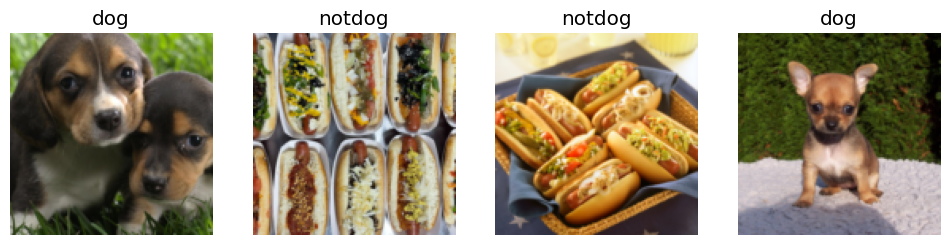

In [43]:
dls.valid.show_batch(max_n=4, nrows=1)

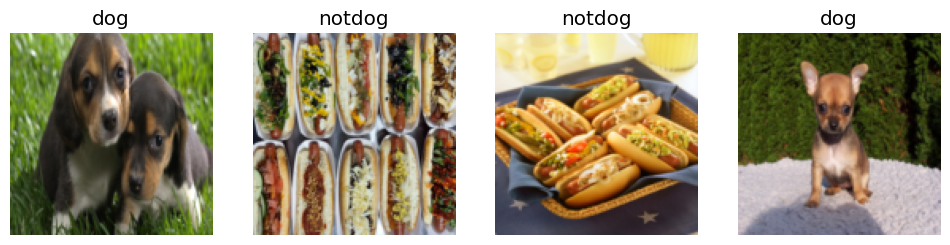

In [44]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

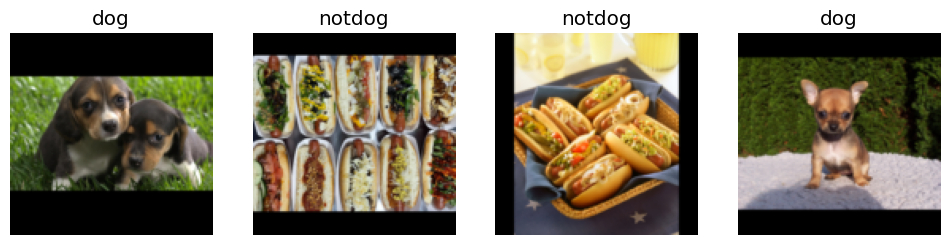

In [45]:
dogs = dogs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

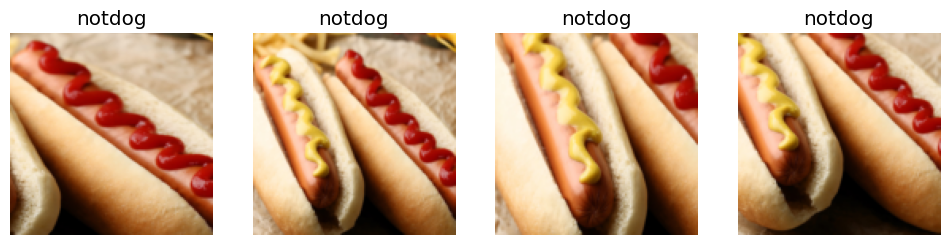

In [46]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

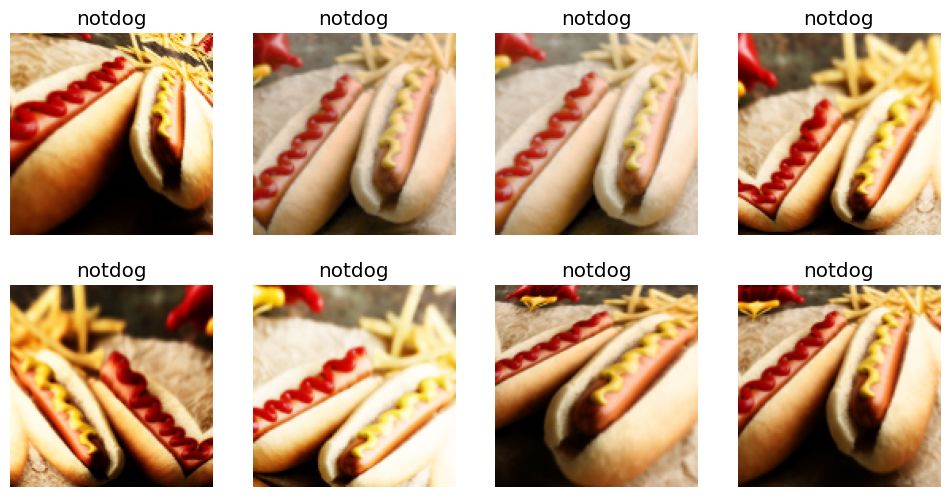

In [47]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [48]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

In [49]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 249MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.086753,0.209965,0.094340,00:39


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.414215,0.121308,0.037736,00:52
1,0.286644,0.056999,0.018868,00:53
2,0.221893,0.042676,0.018868,00:48
3,0.174719,0.036324,0.018868,00:50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


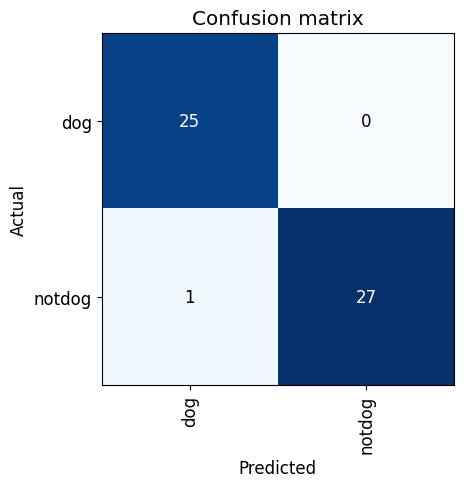

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

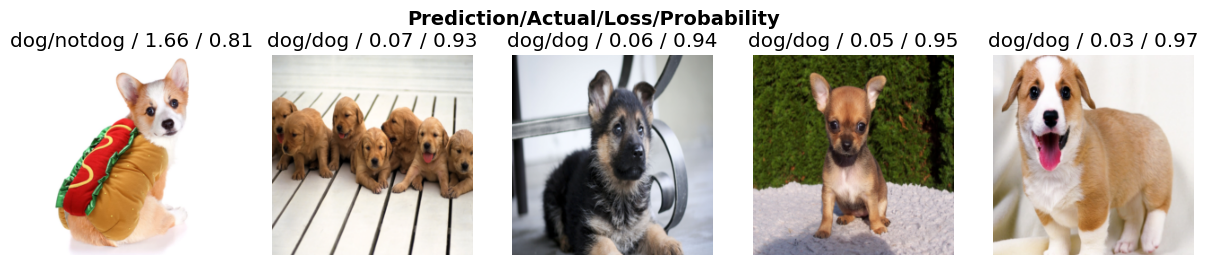

In [51]:
interp.plot_top_losses(5, nrows=1)

In [52]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [53]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [54]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [55]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [56]:
learn.export()

In [57]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
learn_inf = load_learner(path/'export.pkl')

In [64]:
learn_inf.predict('images/dalmation0.jpg')

('dog', tensor(0), tensor([0.8052, 0.1948]))

In [62]:
# prompt: show what is stored in images

!ls images


dalmation0.jpg	dalmation1.jpg


In [65]:
learn_inf.dls.vocab

['dog', 'notdog']

In [66]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [78]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/dalmation1.jpg'])

In [79]:
img = PILImage.create(btn_upload.data[-1])

In [72]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [80]:
pred,pred_idx,probs = learn_inf.predict(img)

In [81]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dog; Probability: 0.8052')

In [82]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [83]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [84]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [85]:
#hide_output
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [86]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila

In [87]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi